<a href="https://colab.research.google.com/github/patrickguevara23/projeto-dengue/blob/main/Projeto_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengue, Temperatura e Chuvas em Campinas-SP
Dados Mensais coletados entre 1998 e 2014
Fonte: https://www.kaggle.com/datasets/renangomes/dengue-temperatura-e-chuvas-em-campinassp

Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#Leitura de dados e análise exploratória das variáveis

In [2]:
#Leitura dos dados
df = pd.read_csv('/content/dengue-dataset.csv')
#Verificando o formato dos dados
print('Formato dos dados \n',df.info())
#Dados estatísticos
print('Dados estatísticos \n',df.describe())
#Verificando dados duplicados
print('O conjunto tem um total de',df.duplicated().sum(),'duplicatas')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB
Formato dos dados 
 None
Dados estatísticos 
        casos-confirmados       chuva  temperatura-media  temperatura-mininima  \
count         204.000000  196.000000         204.000000            204.000000   
mean          357.539216  116.650000          22.200980             17.679412   
std          1741.814759   96.631613           2.399363              3.336316   
min             0.000000    0.800000          16.400000 

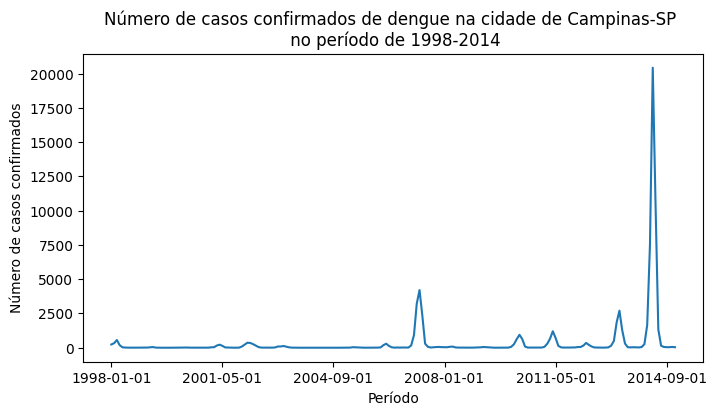

In [3]:
#Gráfico de linhas dos casos confirmados
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df['data'], df['casos-confirmados'])
ax.xaxis.set_major_locator(plt.MultipleLocator(40))
ax.set_title('Número de casos confirmados de dengue na cidade de Campinas-SP \n no período de 1998-2014')
ax.set_xlabel('Período')
ax.set_ylabel('Número de casos confirmados')
plt.show()

In [4]:
#Gráfico de linhas interativo dos casos confirmados

fig = px.line(df, x = 'data', y = 'casos-confirmados',
              title = 'Número de casos confirmados de dengue na cidade de Campinas-SP no período de 1998-2014')

fig.update_traces(line_color = 'green', line_width = 4)

fig.update_layout(width = 1000, height = 500,
                  xaxis = {'tickangle': -45},
                  font_family = 'Arial',
                  font_size = 14,
                  font_color = 'black',
                  title_font_color = 'black',
                  title_font_size = 22,
                  xaxis_title = 'Ano',
                  yaxis_title = 'Número de casos confirmados')
fig.show()

In [5]:
# Convertendo a coluna data_hora para o formato datetime:
df_data = df.copy()
df_data['data'] = pd.to_datetime(df_data['data'])
df_data['mes'] = df_data['data'].dt.month
df_data['ano'] = df_data['data'].dt.year

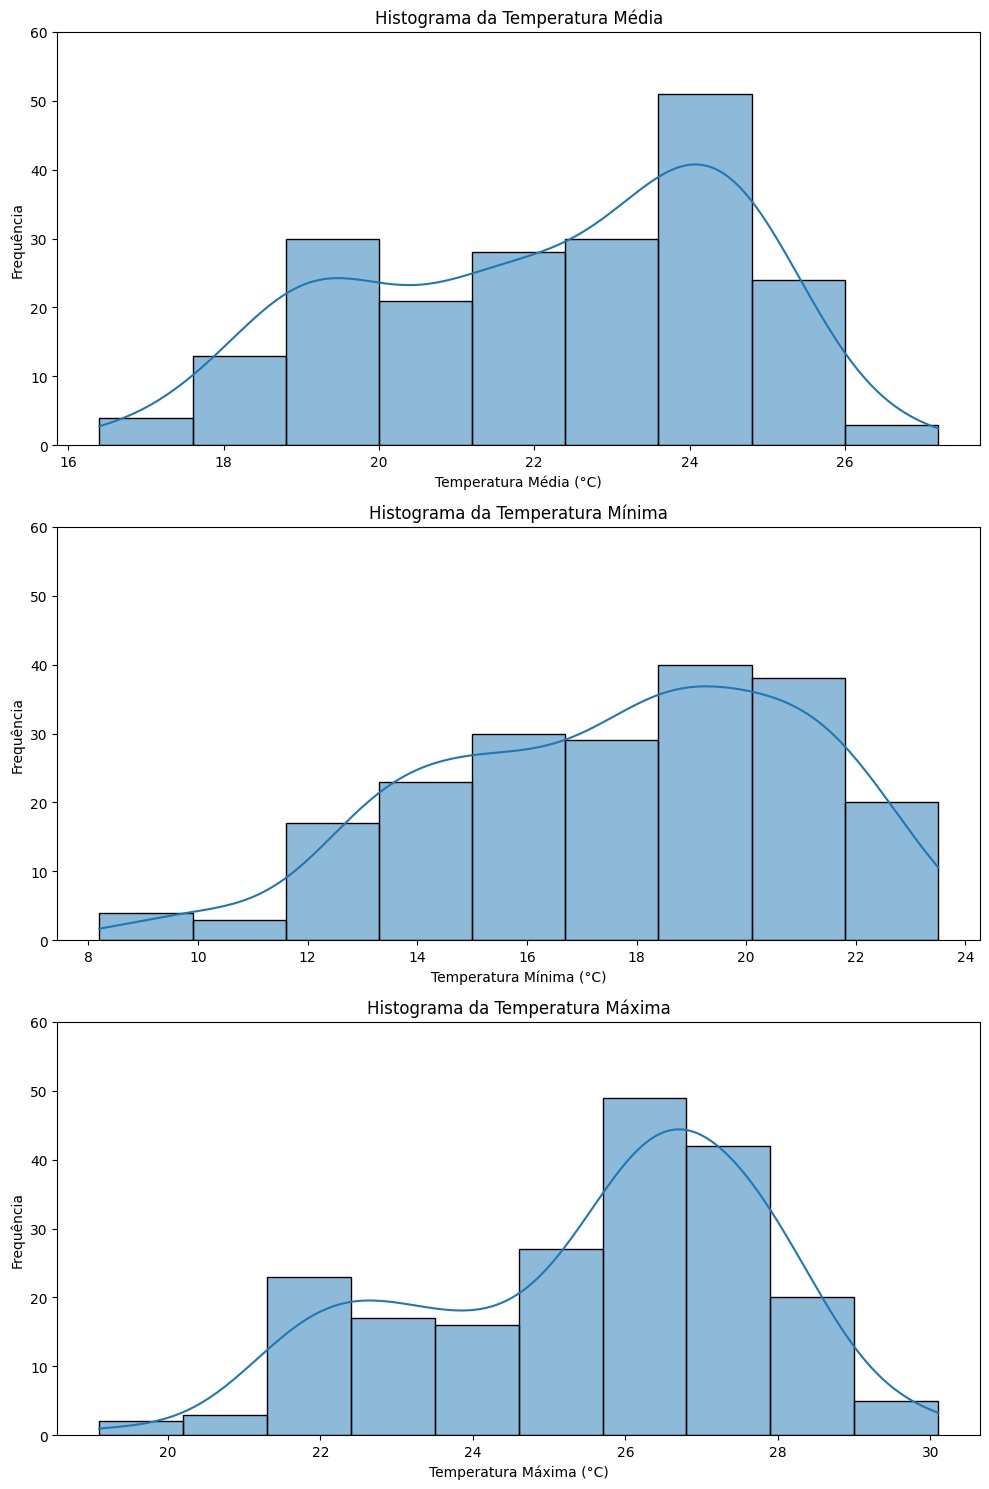

In [6]:
# Gráfico de barra das temperaturas média, mínima e máxima

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=df_data, x="temperatura-media", kde=True, ax=axes[0])
axes[0].set_xlabel("Temperatura Média (°C)")
axes[0].set_ylabel("Frequência")
axes[0].set_title("Histograma da Temperatura Média")

sns.histplot(data=df_data, x="temperatura-mininima", kde=True, ax=axes[1])
axes[1].set_xlabel("Temperatura Mínima (°C)")
axes[1].set_ylabel("Frequência")
axes[1].set_title("Histograma da Temperatura Mínima")

sns.histplot(data=df_data, x="temperatura-maxima", kde=True, ax=axes[2])
axes[2].set_xlabel("Temperatura Máxima (°C)")
axes[2].set_ylabel("Frequência")
axes[2].set_title("Histograma da Temperatura Máxima")

ymin = 0
ymax = 60
for ax in axes.ravel(): #aplicando a mesma escala para todos os graficos
  ax.set_ylim(ymin, ymax)

plt.tight_layout() # Ajustando a escala entre os subplots


plt.show()


In [7]:
# Gerando uma tabela com o valor total de casos por ano
df_casos_por_ano = df_data.groupby('ano')['casos-confirmados'].sum().reset_index()
#Gerando uma tabela com o valor total de casos por mês
df_casos_por_mes = df_data.groupby('mes')['casos-confirmados'].sum().reset_index()


#Gerando um barplot dos casos confirmados por ano
fig = px.bar(df_casos_por_ano, x="ano", y="casos-confirmados",
             title="Casos confirmados de dengue por ano em Campinas-SP",
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="Ano",
    yaxis_title="Número de casos confirmados",
)

fig.show()

#Gerando um barplot dos casos confirmados por mês
fig = px.bar(df_casos_por_mes, x="mes", y="casos-confirmados",
             title="Casos confirmados de dengue por mês em Campinas-SP",
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="Mês",
    yaxis_title="Número de casos confirmados",
)

fig.show()

#Explorando a relação entre as variáveis

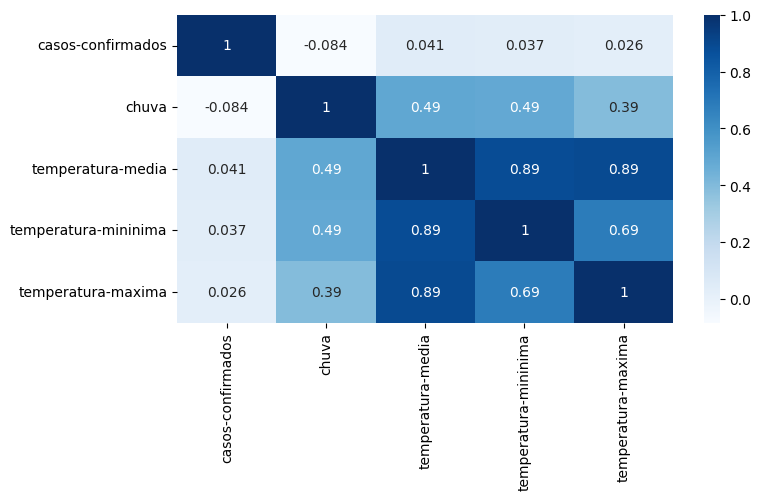

In [8]:
#Gerando um heatmap das variáveis
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

Relacionando a chuva com o numero de casos confirmados

In [9]:
# Gerando um dataframe contendo o total de chuva para cada ano e o total de casos confirmados para cada ano
df_chuva_casos_ano = df_data.groupby('ano').agg(
    total_chuva=('chuva', 'sum'),
    total_casos=('casos-confirmados', 'sum')
).reset_index()
# Gerando um dataframe contendo o total de chuva e o total de casos confirmados para cada mes
df_chuva_casos_mes = df_data.groupby('mes').agg(
    total_chuva=('chuva', 'sum'),
    total_casos=('casos-confirmados', 'sum'),
    temperatura_media_anual=('temperatura-media', 'mean')
).reset_index()

In [10]:
# Gerando um gráfico de linhas interativo utilizando a coluna total_chuva e total_casos por mes

fig = px.line(df_chuva_casos_mes, x="mes", y=["total_chuva", "total_casos"],
              title="Relação entre chuva e casos confirmados de dengue em Campinas-SP")

fig.update_traces(line_width=4)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="Mês",
    yaxis_title="Quantidade de Casos Confirmados",
)

fig.show()


In [11]:
#Gerando um dataframe da variavel df_data  contendo o valor total de casos em cada ano e a média da coluna temperatura-media para cada ano
df_casos_temperatura_media = df_data.groupby('ano').agg(
    total_casos=('casos-confirmados', 'sum'),
    temperatura_media_anual=('temperatura-media', 'mean')
).reset_index()

#Gerando um gráfio de linhas interativo relacionando a temperatura média anual e os casos confirmados
fig = px.line(df_casos_temperatura_media, x="ano", y=["total_casos", "temperatura_media_anual"],
              title="Relação entre a temperatura média anual e os casos confirmados de dengue em Campinas-SP")

fig.update_traces(line_width=4)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="Ano",
    yaxis_title="Quantidade de Casos Confirmados",
)

fig.show()

In [12]:
#Gerando um dataframe da variavel df_data  contendo o valor total de casos em cada mes e a média da coluna temperatura media anual
df_casos_temperatura_mes = df_data.groupby('mes').agg(
    total_casos=('casos-confirmados', 'sum'),
    temperatura_media_anual=('temperatura-media', 'mean')
).reset_index()

#Gerando um gráfio de linhas interativo relacionando a temperatura média anual e os casos confirmados por mes
fig = px.line(df_casos_temperatura_mes, x="mes", y=["total_casos", "temperatura_media_anual"],
              title="Relação entre a temperatura média anual e os casos confirmados de dengue em Campinas-SP")

fig.update_traces(line_width=4)

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="Mês",
    yaxis_title="Quantidade de Casos Confirmados",
)

fig.show()

#Explorando as relações sazonais da doença

In [13]:
#Gerando um dicionário para os meses e as estações do ano
meses_extenso = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

estacoes_do_ano = {
    'Janeiro': 'Verão',
    'Fevereiro': 'Verão',
    'Março': 'Outono',
    'Abril': 'Outono',
    'Maio': 'Outono',
    'Junho': 'Inverno',
    'Julho': 'Inverno',
    'Agosto': 'Inverno',
    'Setembro': 'Primavera',
    'Outubro': 'Primavera',
    'Novembro': 'Primavera',
    'Dezembro': 'Verão' }

#Substituindo os valores no conjunto de dados
df_data['mes'] = df_data['mes'].replace(meses_extenso)
df_data['estacao'] = df_data['mes'].map(lambda x:estacoes_do_ano[x])

<Axes: xlabel='estacao', ylabel='casos-confirmados'>

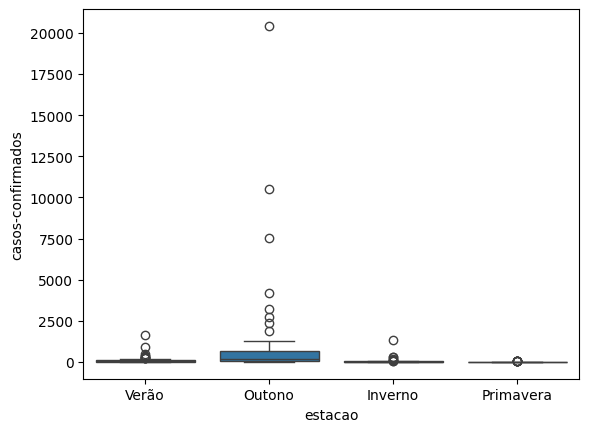

In [14]:
#Gerando um boxplot dos casos confirmados por estação do ano
sns.boxplot(data=df_data, y="casos-confirmados", x="estacao")

<Axes: xlabel='casos-confirmados', ylabel='mes'>

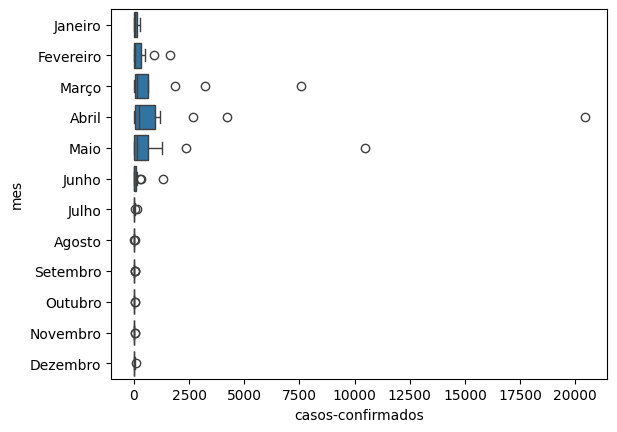

In [15]:
#Gerando um boxplot dos casos confirmados por mes
sns.boxplot(data=df_data, x="casos-confirmados", y="mes")

In [16]:
#Dividindo os dados entre os semestres do ano
df_primeiro_semestre = df_data[df_data['mes'].isin(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'])]
df_segundo_semestre = df_data[df_data['mes'].isin(['Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])]

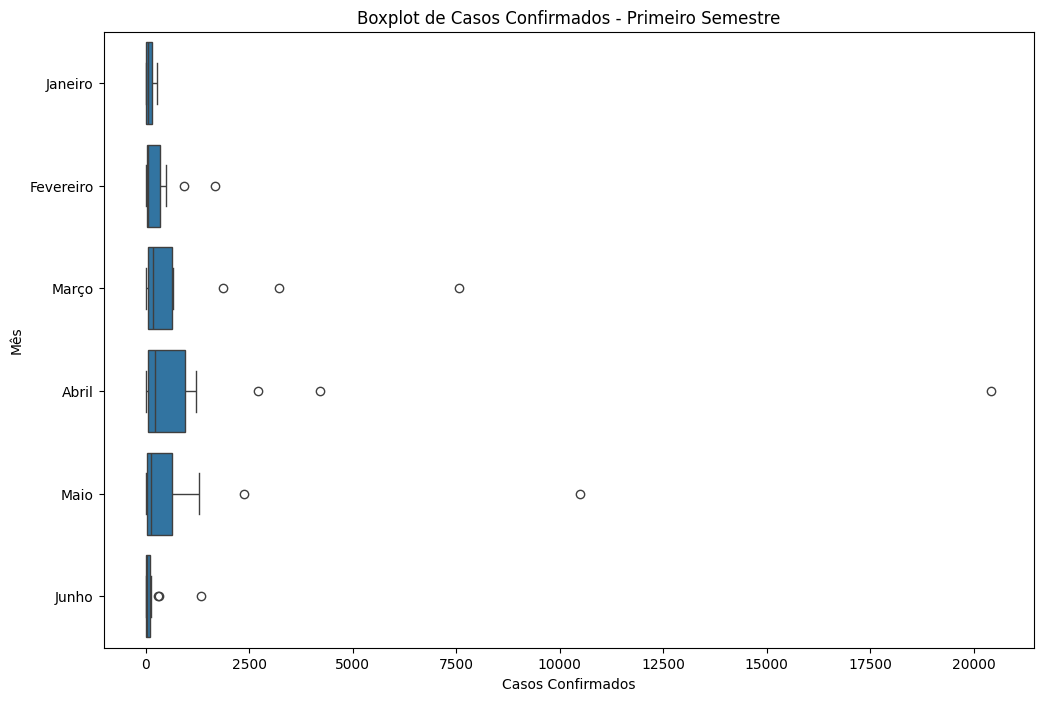

In [17]:
#Gerando um boxplot para o primeiro semestre do ano dos casos confirmados
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_primeiro_semestre, x="casos-confirmados", y="mes")
plt.title('Boxplot de Casos Confirmados - Primeiro Semestre')
plt.xlabel('Casos Confirmados')
plt.ylabel('Mês')
plt.show()

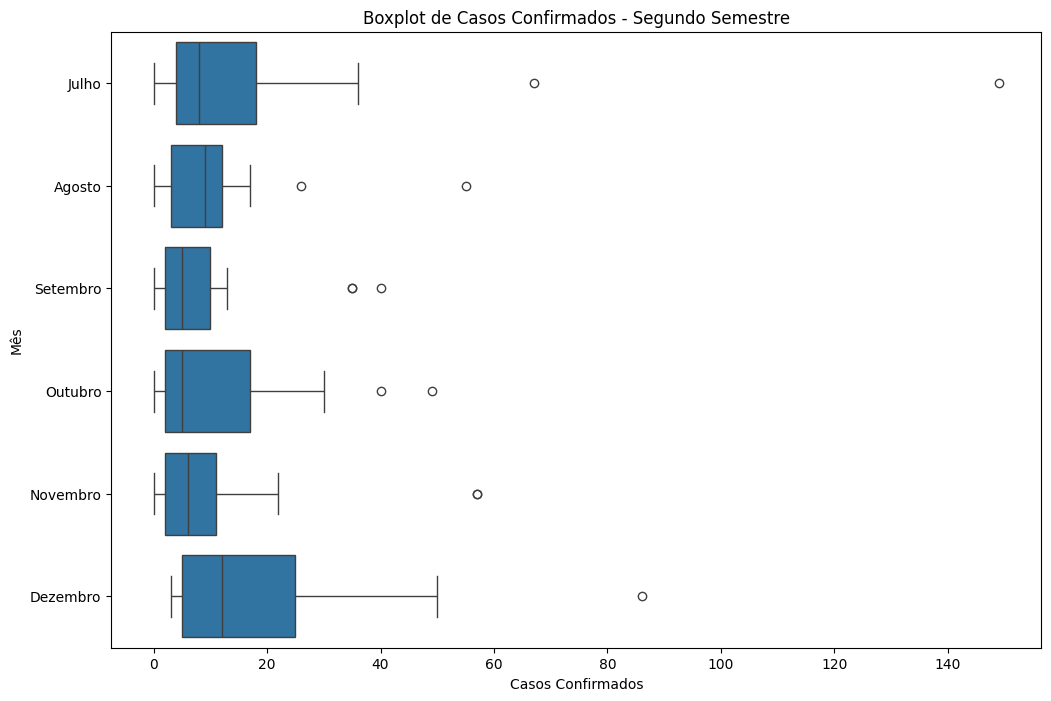

In [18]:
#Gerando um boxplot para o segundo semestre do ano dos casos confirmados
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_segundo_semestre, x="casos-confirmados", y="mes")
plt.title('Boxplot de Casos Confirmados - Segundo Semestre')
plt.xlabel('Casos Confirmados')
plt.ylabel('Mês')
plt.show()

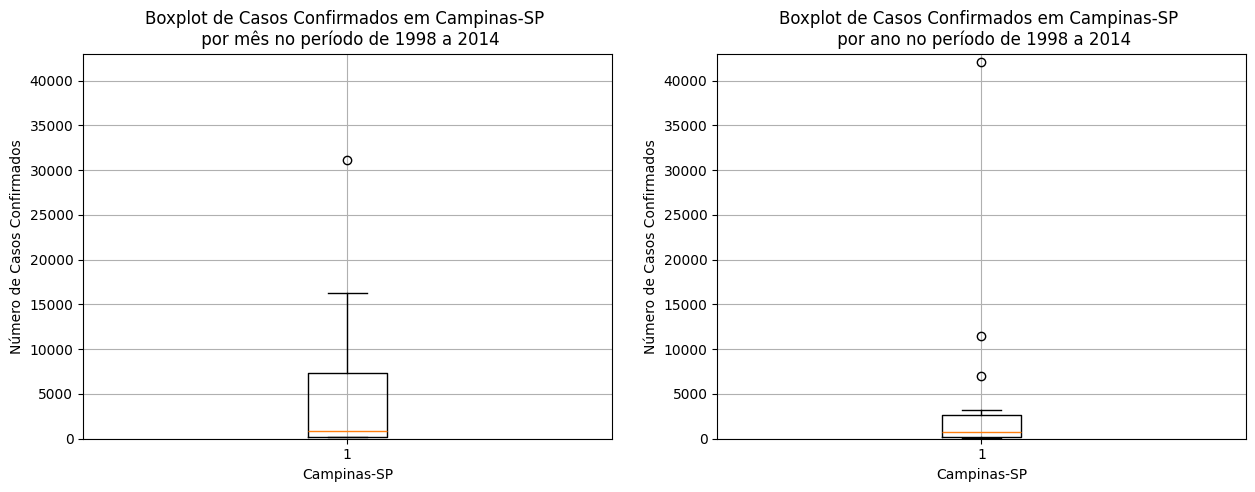

In [19]:
#Gerando dois boxplot dos casos confirmados (por ano e por mes)
fig, axs = plt.subplots(1, 2, figsize=(15,5))
ymin = 0
ymax = 43000
#criando a primeira figura
axs[0].boxplot(df_casos_por_mes['casos-confirmados'])
axs[0].set_title('Boxplot de Casos Confirmados em Campinas-SP \n por mês no período de 1998 a 2014')
axs[0].set_xlabel('Campinas-SP')
axs[0].set_ylabel('Número de Casos Confirmados')
axs[0].grid()
axs[0].set_ylim(ymin, ymax)

#criando a segunda figura
axs[1].boxplot(df_casos_por_ano['casos-confirmados'])
axs[1].set_title('Boxplot de Casos Confirmados em Campinas-SP \n por ano no período de 1998 a 2014')
axs[1].set_xlabel('Campinas-SP')
axs[1].set_ylabel('Número de Casos Confirmados')
axs[1].grid()
axs[1].set_ylim(ymin, ymax)

plt.show()

In [20]:
#Gerando um boxplot interativo para o período da pesquisa por mes
fig = px.box(df_casos_por_mes, y='casos-confirmados',
             title='Boxplot Interativo de Casos Confirmados em Campinas-SP por mês no período de 1998 a 2014')
fig.show()